In a post-pandemic society, more people have sought out ways to share content and connect with other like-minded individuals now more than ever. Twitch, a popular live-streaming platform, has helped bridge the social disconnect. Through this service, anyone can become a streamer, or content creator, allowing thousands of new channels to be created daily. 

Channels/Streamers are rated either Mature, for an 18+ audience, or General, safe for viewing for all ages.

Through the data, we will see if we can establish any correlation between Mature(18+) channels and Followers. We can also discover if there is a significant difference in the average Stream time(minutes)  between channels geared towards a Mature(18+) audience and those that are for a general, all-ages, audience?

By analyzing the performance of Twitch’s top 1,000 streamers, information on audience and content features will help both new streamers and companies looking to endorse them on what trends succeed.

Data source:
https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

In [ ]:
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

import warnings

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
twitch_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/twitchdata-update.csv')

In [ ]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [ ]:
twitch_df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [ ]:
twitch_df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [ ]:
twitch_df.isnull().sum().sort_values()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [ ]:
null_rows = twitch_df[twitch_df.isnull().any(axis=1)]
null_rows.head()

In [ ]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               0 non-null      object
 1   Watch time(Minutes)   0 non-null      int64 
 2   Stream time(minutes)  0 non-null      int64 
 3   Peak viewers          0 non-null      int64 
 4   Average viewers       0 non-null      int64 
 5   Followers             0 non-null      int64 
 6   Followers gained      0 non-null      int64 
 7   Views gained          0 non-null      int64 
 8   Partnered             0 non-null      bool  
 9   Mature                0 non-null      bool  
 10  Language              0 non-null      object
dtypes: bool(2), int64(7), object(2)
memory usage: 0.0+ bytes


In [ ]:
zero_filled = null_rows.fillna(0)
zero_filled.head(10)


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language


In [ ]:
twitch_df['Mature'].value_counts()

False    770
True     230
Name: Mature, dtype: int64

##HYPOTHESIS 1
Null Hypothesis: There is no significant difference is follower count between Mature(18+) streamers and general(all ages) streamers.

Alt. Hypothesis: There is a significant difference is follower count between Mature(18+) streamers and general(all ages) streamers.

In [ ]:
twitch_df_Mature = twitch_df.loc[twitch_df['Mature'] == True]
twitch_df_General = twitch_df.loc[twitch_df['Mature'] == False]

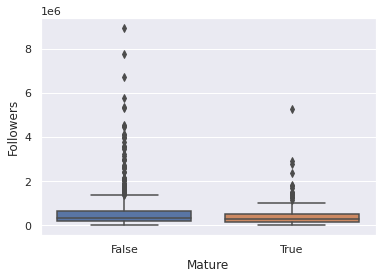

In [ ]:
sns.boxplot(y = twitch_df['Followers'], x = twitch_df['Mature'])

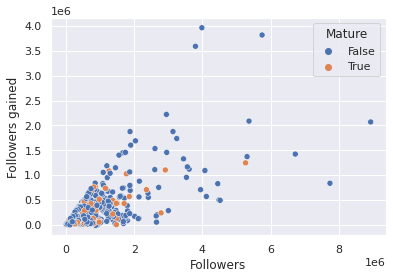

In [ ]:
sns.scatterplot(x='Followers', y='Followers gained', hue='Mature', data=twitch_df)

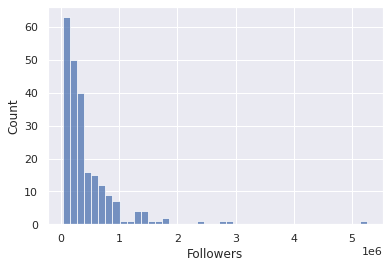

In [ ]:
sns.histplot(twitch_df_Mature["Followers"])

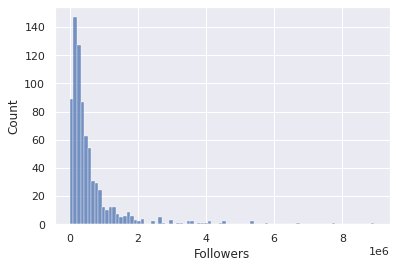

In [ ]:
sns.histplot(twitch_df_General["Followers"])

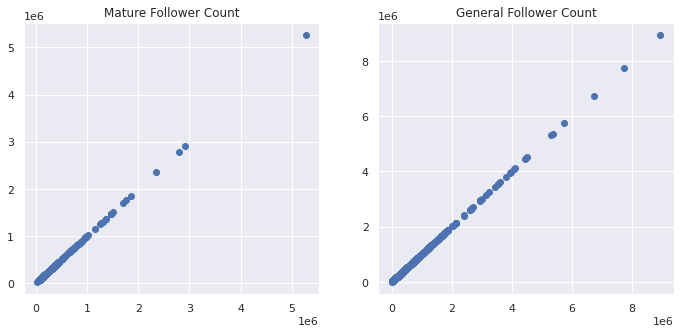

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(twitch_df_Mature["Followers"], twitch_df_Mature["Followers"])
plt.title("Mature Follower Count")

plt.subplot(1,3,2)
plt.scatter(twitch_df_General["Followers"], twitch_df_General["Followers"])
plt.title("General Follower Count")

plt.show()


In [ ]:
stats.pearsonr(twitch_df['Followers'],twitch_df['Followers gained'])

(0.7156184583458499, 1.0469037954811538e-157)

In [ ]:
stats.ttest_ind(twitch_df_Mature['Followers'], twitch_df_General['Followers'])

Ttest_indResult(statistic=-2.8074935086573842, pvalue=0.005090151971780063)

From the scatter plots we can see that there is a presence of a significance difference/correlation between the follower count of mature streamers and general streamers, with general streamers having more. **Null hypothesis rejected**

###HYPOTHESIS 2
Null Hypothesis: There is no difference between the stream time of both groups. 

Alt. Hypothesis: There is a signifcant difference in stream time between both groups. 

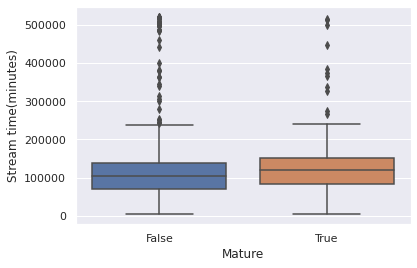

In [ ]:
sns.boxplot(y = twitch_df['Stream time(minutes)'], x = twitch_df['Mature'])

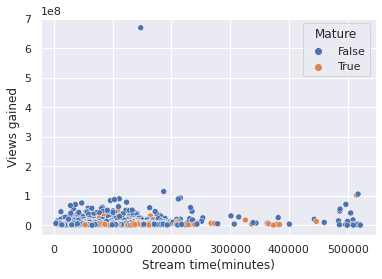

In [ ]:
sns.scatterplot(x='Stream time(minutes)', y='Views gained', hue='Mature', data=twitch_df)

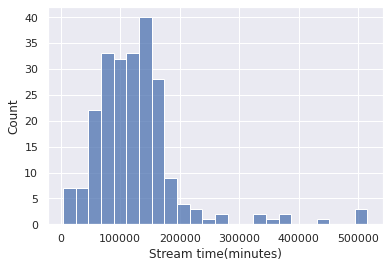

In [ ]:
sns.histplot(twitch_df_Mature["Stream time(minutes)"])

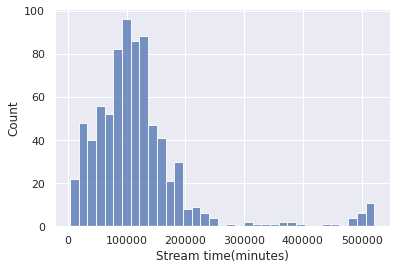

In [ ]:
sns.histplot(twitch_df_General["Stream time(minutes)"])

In [ ]:
stats.ttest_ind(twitch_df_Mature['Stream time(minutes)'], twitch_df_General['Stream time(minutes)'])

Ttest_indResult(statistic=1.4223352450267488, pvalue=0.15524141327284724)

Based off the t-test we see that there is no significant difference in stream time between 18+ streamers and the general streamers. The 18+ streamers have a higher stream time. **Fail to Reject Null hypothesis**

###Recommendations

Based on findings from both hypotheses, we can learn from both groups how to have a more successful Twitch channel. If your goal is to increase more followers/the number of people the channel regularly interacts with, I would suggest paying attention to general(all ages) streamers who were tested to have a higher average follower count.

Instead, if your goal is to increase stream time/the time you spend actually interacting with your viewers, Mature(18+) channels can be an example for maximizing stream time. 

Additionally, companies who wish to endorse/sponsor streamers can take advantage of both audiences. As Twitch is increasing in popularity, partnering with streamers has become an easy way to advertise products and services. I would recommend that they invest in Mature(18+) channels, as they have been shown to spend more time interacting with their viewers.
